## Statistical Analysis of N170 area using Linear Regression
*T* Load the data into a pandas dataframe. A very useful concept here is the concept of a tidy dataframe. The idea is, that every observation is one row of a table, where columns are potential features / descriptors + the independent variable (the average activity at PO8 here).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as numpy
d = pd.read_csv("../ex6_N170.csv",delimiter=",")


In [2]:
d

,epoch,stim,cond,PO8,bsl
0,1,car,scrambled,8.835035,2.375931
1,4,car,intact,-9.949910,-0.513365
2,6,car,scrambled,2.609454,-4.410792
3,7,face,scrambled,-4.120405,-8.484117
4,9,car,intact,-1.127925,3.305076
...,...,...,...,...,...
240,316,face,intact,-2.478639,3.748255
241,317,car,intact,-10.040087,-1.260044
242,318,car,scrambled,-1.897411,-4.049000
243,319,car,intact,-3.982105,7.121623


**T:** Use a plottinglibrary of your choice to visualise the simple scatter plot between some/all variables. I recommend packages *seaborn* e.g. pairplot) or *plotnine* for this. They make it easy to split up plots of continuous variables (e.g. baseline vs. PO8) by a categorical variable, e.g. *cond* (scrambled/intact).

**Q:** Can you already guess what the relationships between the variables are, solely based on the plots?

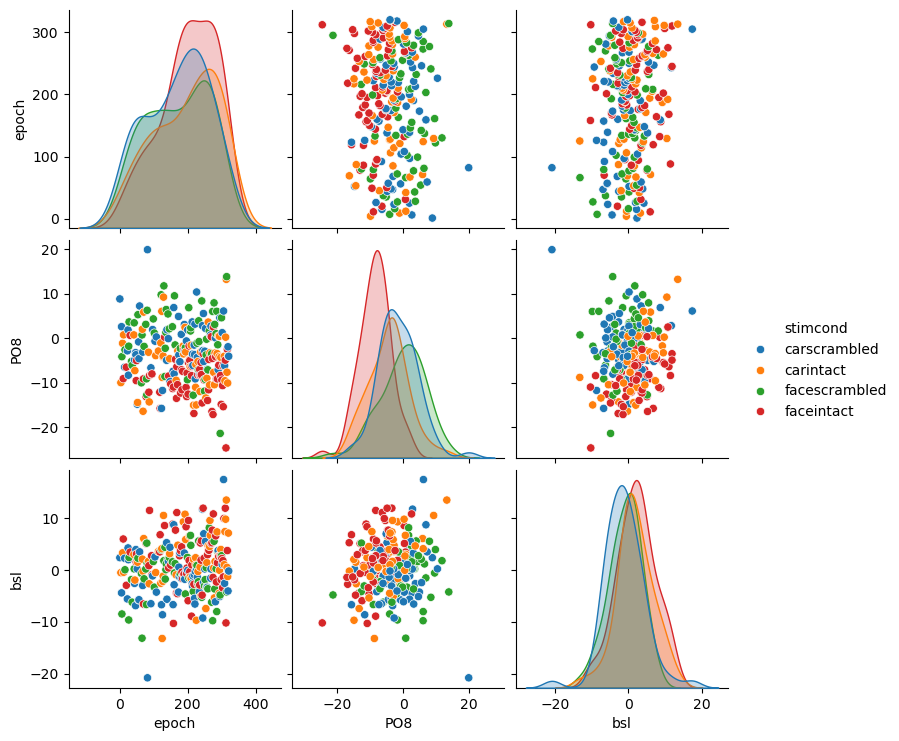

In [8]:
sns.pairplot(d,hue="stimcond",)

In [7]:
d["stimcond"] = d.stim + d.cond

### Do-It-Yourself Linear Models
We have to generate a DesignMatrix in order to fit our model. The simplest designmatrix consists only of "1", one for each data-point.

**T:** Generate this designmatrix and fit it using the pseudo-inverse: $(X^TX)^{-1}X^TY$. I recommend to generate a function similar to this:
```python
def solve(*args):
    # generate designmatrix by stacking
    X = np.stack(args).T
    return PSEUDOINVERSE
```
Because we will need it quite often.

**Q:** What does the resulting value *mean*? Note: The result is often called a "beta"

*Note: While the pseudoinverse is great because it is easy to understand what is going on, typically we would not directly use it but rather go over a Cholesky-Decomposition first. This will greatly increase numeric stability. But right now we do not care much about that*

In [10]:
import numpy as  np

def solve(*args):
    X = np.stack(args).T
    #print(X)
    return np.linalg.inv(X.T @ X)@X.T@d.PO8.values

In [12]:
const = np.ones(d.shape[0])

print("Const-only{},mean:{}".format(solve(const),np.mean(d.PO8)))

Const-only[-3.91109151],mean:-3.911091509146645


$y_i = \beta_0*X_1  + e_i$ with $X_i = 1$

(array([ 2.,  6., 25., 52., 68., 46., 32., 10.,  3.,  1.]),
 array([-24.60192801, -20.15315921, -15.70439042, -11.25562162,
         -6.80685282,  -2.35808403,   2.09068477,   6.53945357,
         10.98822237,  15.43699116,  19.88575996]),
 <BarContainer object of 10 artists>)

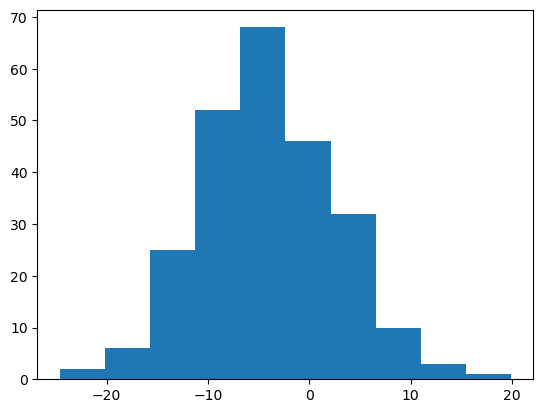

In [14]:
from matplotlib import pyplot as plt
plt.hist(d.PO8)

In [ ]:
solve(const)

**T:** Now we add the condition *cond* to the designmarix (thus `PO8 ~ intercept + cond`) which differentiates between intact and scrambled images. Because this is a categorical variable we have to encode it first. For that, we need a "1" when images are intact and a "0" if they were scrambled. Fit the model

**Q:** What do the outputs mean now?

In [15]:
cond = 1.*(d.cond.values == 'intact')

cond

array([0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0.

In [16]:
print(solve(const,cond))

[-0.97665794 -5.75148979]


$\hat{y} = \beta_0 + \beta_1 * X_{cond}$

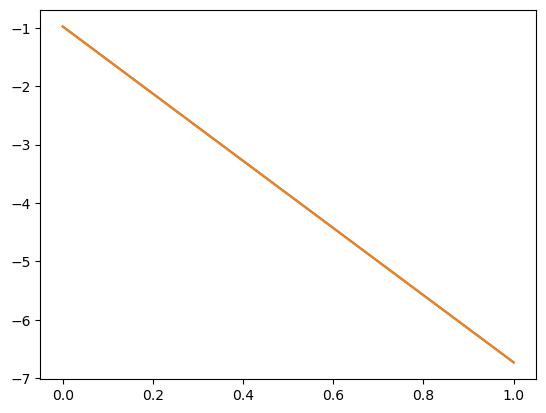

In [20]:
plt.plot([0,1],[d.PO8[d.cond=="scrambled"].mean(),d.PO8[d.cond=="intact"].mean()])
plt.plot([0,1],[-0.98*1+ -5.75*0, -0.98*1+ -5.75*1])

**T:** Next add a predictor for stimulus (`PO8 ~ intercept + cond + stim`) and fit it.

**Q:** What changed to the previous modelfit - *Bonus*: An idea why the size of the change is the size it is? Hint: It has to do with correlations

$\hat{y} = \beta_0 + \beta_1 * X_{cond} + \beta_2 * X{stim}$

In [21]:
stim = 1.*(d.stim.values == 'face')
print(solve(const,cond))
# intact, face
print(solve(const,cond,stim))

[-0.97665794 -5.75148979]
[-0.29596347 -5.63868899 -1.458631  ]


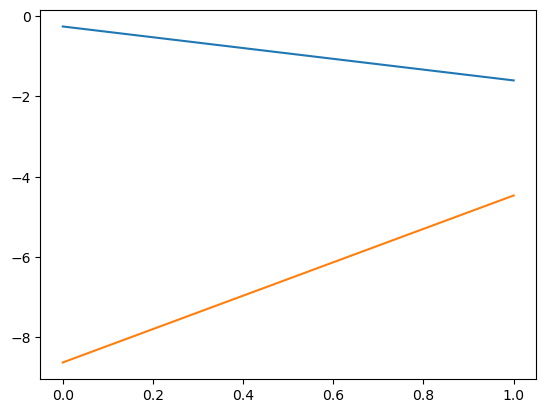

In [22]:
plt.plot([0,1],[d.PO8[(d.cond=="scrambled") & (d.stim=="face")].mean(),d.PO8[(d.cond=="scrambled") & (d.stim=="car")].mean()])
plt.plot([0,1],[d.PO8[(d.cond=="intact") & (d.stim=="face")].mean(),d.PO8[(d.cond=="intact") & (d.stim=="car")].mean()])                  

b0 = -0.29

plt.plot([0,1],[-0.29*1+ -5.75*0, -0.98*1+ -5.75*1])


-0.29 -5.6 -1.5

In [ ]:
# investigate correlation between cond and interaction of cond*stim
np.corrcoef(cond,stim*cond)

**T:** And an interaction (column of stimulus * column of cond)

**Q:** What do the betas/results/parameters mean now? (You might want to do the plotting of the next step to help your interpretation)


In [ ]:
print(solve(const,cond))
print(solve(const,cond,stim))
print(solve(const,cond,stim,cond*stim))

Now we have what we call a 2x2 design. Two categorical factors (often only "factor") with two levels each + the interaction. 

**T:** It is about time to plot our results! Put cond on the x, and use color for stimulus. We will reconstruct our original data first:

You should reconstruct 4 values, one for **intact faces**, one for **scrambled faces**, one for **intact cars** and one for **scrambled cars**. It migt be helpful to explicitly write down the models ($y  = 1*\beta_0 + ...$ )




<Axes: xlabel='stim', ylabel='est'>

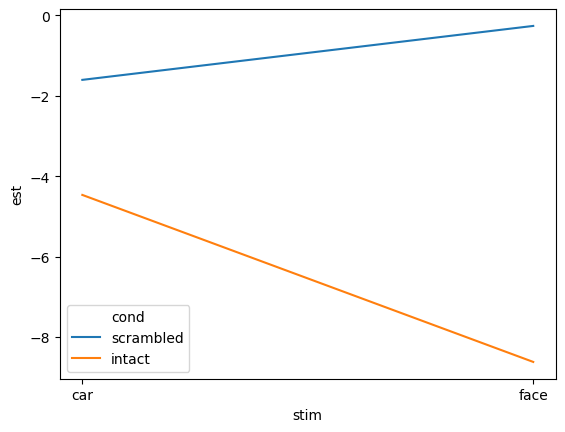

In [44]:
est = solve(const,cond,stim,cond*stim)
#est = solve(const,cond,stim)
#est = np.append(est,0)
res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    1*est[0]+0*est[1] + 0*est[2] + 0*0*est[3],
                    1*est[0]+1*est[1] + 0*est[2] + 1*0*est[3],
                    1*est[0]+0*est[1] + 1*est[2] + 0*1*est[3],
                    1*est[0]+1*est[1] + 1*est[2] + 1*1*est[3]]})
sns.lineplot(x=res.stim,y=res.est,hue=res.cond)

$\beta_0 *1 + \beta_1 * X_1(1,0) + \beta_2 * X_2(1,0)$

$\beta_0 *1 + \beta_1 * X_1(0.5,-0.5) + \beta_2 * X_2(0.5,-0.5)$

$\beta_0 *1 + \beta_1 * 1 + \beta_2 * 0$

$\beta_0 *1 + \beta_1 * 0.5 + \beta_2 * 0$

## Changing Bases
We discussed in the lecture that it is possible to change the bases. We will go back to the simple example of of `Intercept + cond`. But in addition of *dummy coding* (intact == 1, scrambled == 0), we will fit a second model with *effect-coding* (intact == 0.5, scrambled = -0.5). 

**Q:** How do the betas compare of the two models? How does the interpretation change?

**Hint** If you need more you can read two of my tutorial-blogposts on this topic  [here](https://benediktehinger.de/blog/science/dummy-coding-and-effects-coding/) and [here :)](https://benediktehinger.de/blog/science/interaction-and-effect-sum-coding/) 

In [38]:
cond

array([0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0.

In [ ]:
cond-0.5

In [39]:
(np.mean(d.PO8[(d.cond=="scrambled")]) + np.mean(d.PO8[(d.cond=="intact")]))/2

-3.8524028378068995

In [40]:
np.mean(d.PO8)

-3.911091509146645

In [41]:
print(solve(const,cond))
print(solve(const,cond-0.5))


[-0.97665794 -5.75148979]
[-3.85240284 -5.75148979]


**T:** Now we run the full 2x2 model once with dummy and once with effect-coding. The interaction of an effect-coded model is still just the designmatrix columns multiplied with eachother

**Q:** Can you put the results together, why do they have the results they have?


In [42]:
print(solve(const,cond-0.5,stim-0.5,(cond-0.5)*(stim-0.5)))
print(solve(const,cond,stim,cond*stim)) # dummy cding / treatment coding

[-3.73857326 -5.61334487 -1.40707547 -5.4995781 ]
[-1.60325761 -2.86355582  1.34271358 -5.4995781 ]


### Continuous Regressors

Now it is time to involve our continuous regressor. In this case it is the baseline-value. We are following here the relatively new approach of [Alday 2019](https://onlinelibrary.wiley.com/doi/full/10.1111/psyp.13451) and instead of subtracting a baseline, we will regress it out. We did not talk about baseline correction in the lecture, this is something I will talk about at the end of the course.

In theory baseline corrections are not needed, the baseline (i.e. what happens before stimulus onset, thus "negative" time in an ERP) should be flat / noise around 0, because stimulus order is random. But in practice, we only have limited number of trials and limited randomization. Thus it might be, that we have a bias with in one condition more residual drift / low-frequency activity than in the other. This will "move" the whole ERP curve up/down and bias results later in the epoch.

Classically, baselines are simply subtracted. Thus every point of an ERP recieves the "same" baseline correction. This is equivalent to adding a known parameter to our model: `y ~ b0 * constant + b1 * cond + stim +1*BSL`. What we will do instead is the 2020-version, we regress the baseline. This allows us to remove less of the baseline activity (or more, but rarely happens).

**T:** Plot the PO8 actiity against the baseline (you might have done this plot at the beginning of the exercise). Split it up by cond & stim


<Axes: xlabel='bsl', ylabel='PO8'>

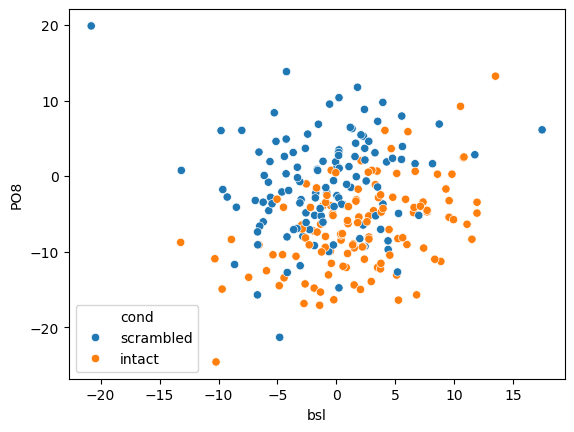

In [29]:
sns.scatterplot(x=d.bsl,y=d.PO8,hue=d.cond)

<Axes: xlabel='bsl', ylabel='PO8'>

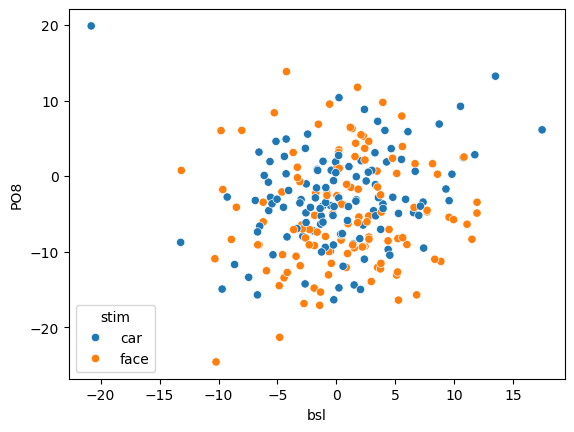

In [30]:
sns.scatterplot(x=d.bsl,y=d.PO8,hue=d.stim)



**T:** Add the baseline as a predictor to your 2x2 model. 

**Q:** What is the resulting beta?




In [31]:
print(solve(const,cond,stim,cond*stim,d.bsl))
print(solve(const,cond,stim,cond*stim))

[-1.23950777 -3.80187398  1.27907238 -5.53859036  0.32611814]
[-1.60325761 -2.86355582  1.34271358 -5.4995781 ]


Typically we do not only remove the overall baseline, but condition-indivudal baselines. 

**T:** Thus we have to generate interactions with all predictors & interaction of the interactions too

**Q:** What is your interpretation of the resulting betas? For which conditions do we really need a baseline correction and how strong should it be?

In [32]:
print(solve(const,cond,stim,cond*stim,d.bsl))
print(solve(const,cond,stim,cond*stim,d.bsl,d.bsl*cond,d.bsl*stim,d.bsl*cond*stim))

[-1.23950777 -3.80187398  1.27907238 -5.53859036  0.32611814]
[-1.59620965 -4.05240262  1.58967869 -5.42777959  0.00631882  0.66445615
  0.26970879 -0.5248866 ]


$y - BSL = \beta_0 \dots$

$y = \beta_0 \dots + BSL$

$y = \beta_0 \dots + \gamma_0 * BSL$

<Axes: xlabel='cond', ylabel='est'>

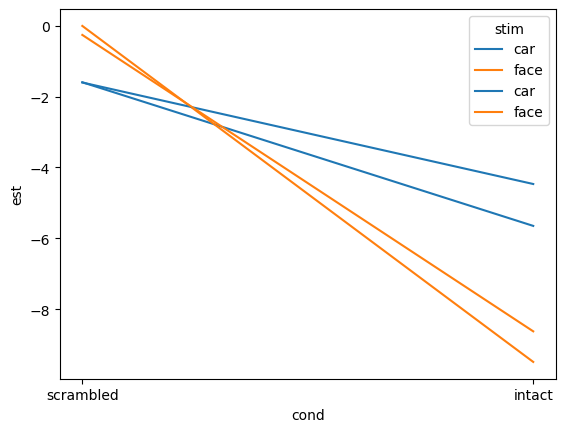

In [33]:
est = solve(const,cond,stim,cond*stim,d.bsl,d.bsl*cond,d.bsl*stim,d.bsl*cond*stim)
#est = solve(const,cond,stim,cond*stim,d.bsl)

res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    1*est[0]+0*est[1] + 0*est[2] + 0*0*est[3],
                    1*est[0]+1*est[1] + 0*est[2] + 1*0*est[3],
                    1*est[0]+0*est[1] + 1*est[2] + 0*1*est[3],
                    1*est[0]+1*est[1] + 1*est[2] + 1*1*est[3]]})
sns.lineplot(x=res.cond,y=res.est,hue=res.stim)

est = solve(const,cond,stim,cond*stim)
res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    1*est[0]+0*est[1] + 0*est[2] + 0*0*est[3],
                    1*est[0]+1*est[1] + 0*est[2] + 1*0*est[3],
                    1*est[0]+0*est[1] + 1*est[2] + 0*1*est[3],
                    1*est[0]+1*est[1] + 1*est[2] + 1*1*est[3]]})
sns.lineplot(x=res.cond,y=res.est,hue=res.stim)

## Bonus: Uncertainty & Standard Errors
This was not part of the lecture, but might be interesting nonetheless. In this exercise we talk about how we can generate errorbars to add to our 2x2 plot.

We can not only estimate the $\hat{\beta}$, our estimated parameters, but also the variance of them, giving us a handle of uncertainty. We just need some additional assumptions (normal residuals). For a derivation see [this](https://stats.stackexchange.com/questions/390836/standard-error-and-confidence-interval-for-multiple-linear-regression-in-matrix). 

It turns out, that $Var(\beta) = \sigma^2 (X^TX)^{-1}$

**T:** Implement this formula. The sqrt of the diagonal elements are your Standard-Errors, which we can use as error-bars. The $\sigma^2$ is the variance of the residuals




$Y_i = X\beta + e_i$

$Y_i - X\beta = e_i$

In [34]:
import numpy as  np

def se(*args):
    X = np.stack(args).T
    b = np.linalg.inv(X.T @ X)@X.T@d.PO8
    e = d.PO8-X@b
    s = np.var(e)
    return np.sqrt(np.diag(s * np.linalg.inv(X.T @ X)))

se = (se(const,cond,stim,cond*stim))    
es = (solve(const,cond,stim,cond*stim))    
print(es)
print(se)

print(es/se)

[-1.60325761 -2.86355582  1.34271358 -5.4995781 ]
[0.73685984 1.07359417 1.07865236 1.51134258]
[-2.17579724 -2.66726095  1.2448066  -3.63886929]


Now we have to apply it including our contrast vectors e.g. c = [1 0 0 0*0], or c=[1 0 1 1*0]

$$se_c = \sigma^2 c^T (X^TX)^{-1} c$$


In [35]:
def se_contrast(*args,c=[1,0,0,0]):
    c = np.array(c)
    X = np.stack(args).T
    b = np.linalg.inv(X.T @ X)@X.T@d.PO8
    e = d.PO8-X@b
    s = np.var(e)
    #print(np.sqrt(c.T @ np.linalg.inv(X.T @ X) @c))
    return np.sqrt(s * c.T @ np.linalg.inv(X.T @ X) @c)

se_A = se_contrast(const,cond,stim,cond*stim,c = [1,1,0,0])
se_A


0.7807957629392348

In [36]:
res

,stim,cond,est
0,car,scrambled,-1.603258
1,car,intact,-4.466813
2,face,scrambled,-0.260544
3,face,intact,-8.623678


<ErrorbarContainer object of 3 artists>

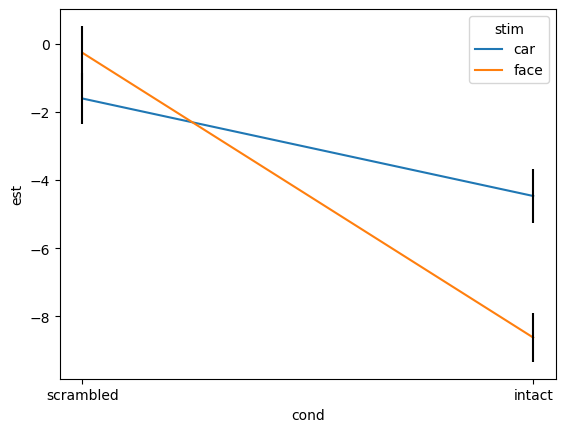

In [37]:
from matplotlib import pyplot as plt
est = solve(const,cond,stim,cond*stim)
res = pd.DataFrame({"stim":["car","car","face","face"],
              "cond":["scrambled","intact","scrambled","intact"],
              "est": [
                    est@np.array([1,0 ,0,0*0]),
                    est@np.array([1,1 ,0,1*0]),
                    est@np.array([1,0 ,1,0*1]),
                    est@np.array([1,1 ,1,1*1])],
               "se": [se_contrast(const,cond,stim,cond*stim,c = [1,0,0,0]),
                     se_contrast(const,cond,stim,cond*stim,c = [1,1,0,0]),
                     se_contrast(const,cond,stim,cond*stim,c = [1,0,1,0]),
                     se_contrast(const,cond,stim,cond*stim,c = [1,1,1,1])]})
sns.lineplot(x=res.cond,y=res.est,hue=res.stim)
plt.errorbar(x=res.cond,y=res.est,yerr=res.se,fmt="none",c = 'k')

In [ ]:
"y~1+cond+stim+cond:stim+bsl+bsl:cond+bsl:stim+bsl:cond:stim"
fit(LinearModel,"y~1+cond*stim*bsl",d) 
